The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
60000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 7,850.0
Trainable params: 7,850.0
Non-trainable params: 0.0
_________________________________________________________________


/Users/soneo/.pyenv/versions/3.5.2/lib/python3.5/site-packages/keras/models.py:826: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 9 samples, validate on 1 samples
Epoch 1/1
9/9 [==============================] - 0s - loss: 2.3563 - acc: 0.1111 - val_loss: 1.7040 - val_acc: 1.0000


<IPython.core.display.Javascript object>


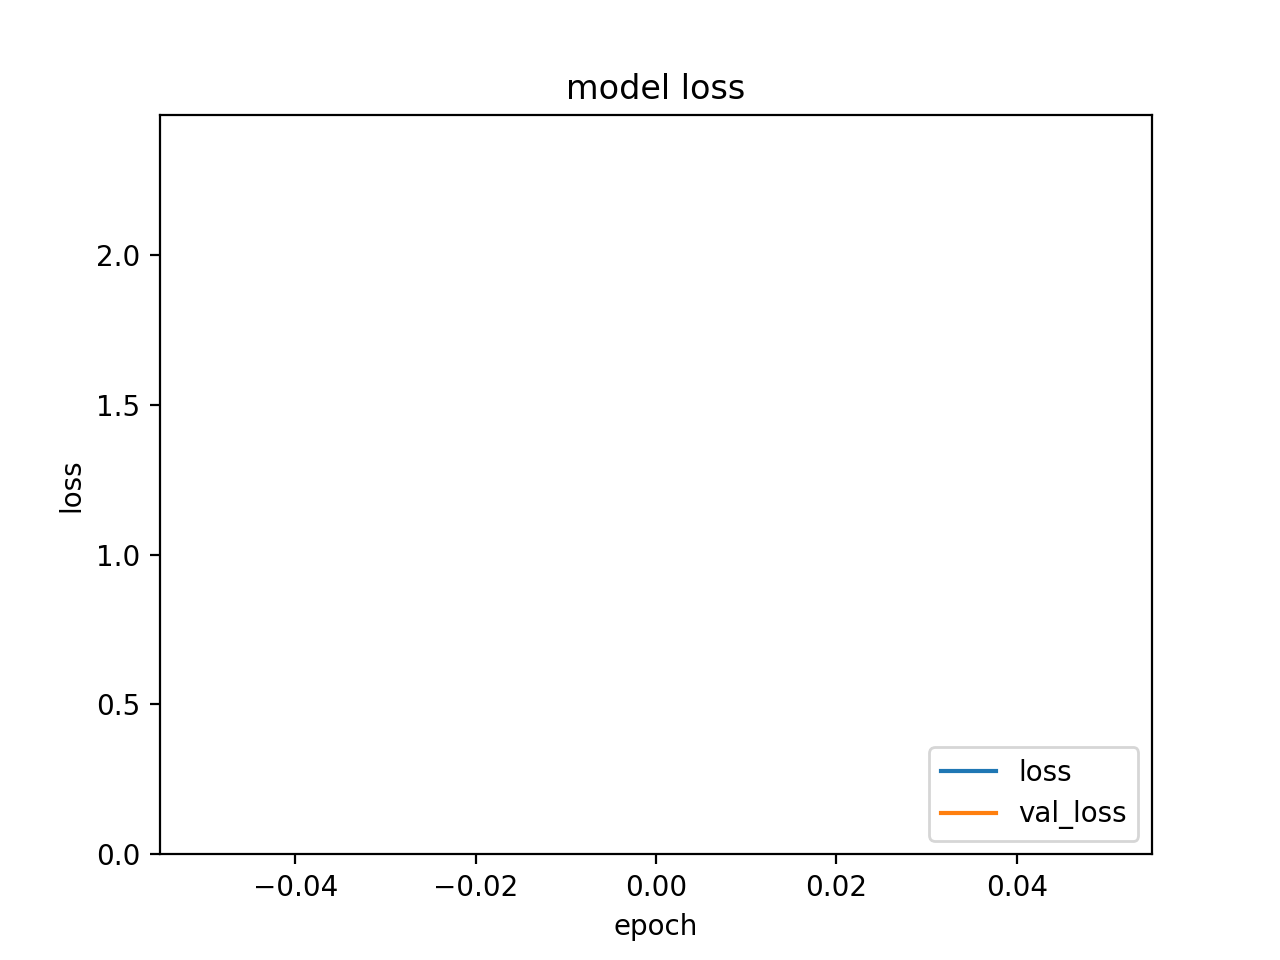

In [3]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.utils import np_utils

nb_classes = 10
batch_size = 1
nb_epoch = 1

# MNISTデータのロード
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 画像を1次元配列化
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

# 画素を0.0-1.0の範囲に変換
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# one-hot-encoding
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adam
# from keras.utils.visualize_util import plot

def build_multilayer_perceptron():
    model = Sequential()

    model.add(Dense(10, input_shape=(784,)))
    model.add(Activation('softmax'))

    return model

# 多層ニューラルネットワークモデルを構築
model = build_multilayer_perceptron()

# モデルのサマリを表示
model.summary()
# plot(model, show_shapes=True, show_layer_names=True, to_file='model.png')

# モデルをコンパイル
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

# Early-stopping
# early_stopping = EarlyStopping(patience=0, verbose=1)

# モデルの訓練
history = model.fit(X_train[:10], Y_train[:10],
                    batch_size=batch_size,
                    nb_epoch=nb_epoch,
                    verbose=1,
                    validation_split=0.1)

def plot_history(history):
    # print(history.history.keys())

    # 精度の履歴をプロット
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['acc', 'val_acc'], loc='lower right')
    plt.show()

    # 損失の履歴をプロット
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['loss', 'val_loss'], loc='lower right')
    plt.show()

# 学習履歴をプロット
plot_history(history)